In [1]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
np.random.seed(42)

In [4]:
# creating output and input data

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # True relation: y = 4 + 3x + Gaussian noise

In [11]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / m) * np.sum(np.square(predictions - y))
    return cost

In [12]:
def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=100):
    m = len(y)
    
    # Random initialization of weights (theta)
    # theta[0] is bias/intercept, theta[1] is slope/weight
    theta = np.random.randn(2, 1) 
    
    history = {
        'cost': [],
        'theta_0': [], # Bias history
        'theta_1': []  # Weight history
    }

    print(f"Starting Gradient Descent with LR={learning_rate}...")

    for iteration in range(n_iterations):
        # 1. Calculate Gradient
        # Formula: (2/m) * X.T dot (Predictions - y)
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        
        # 2. Update Parameters
        theta = theta - learning_rate * gradients
        
        # 3. Log History (for visualization)
        cost = compute_cost(X, y, theta)
        history['cost'].append(cost)
        history['theta_0'].append(theta[0][0])
        history['theta_1'].append(theta[1][0])
        
        if iteration % 10 == 0:
            print(f"Iteration {iteration}: Cost {cost:.4f}")

    print(f"Final Theta: {theta.ravel()}")
    return theta, history

In [13]:
def create_visualizations(X_raw, y, history):

    t0_vals = np.linspace(0, 6, 50) # Bias range
    t1_vals = np.linspace(0, 5, 50) # Weight range
    J_vals = np.zeros((len(t0_vals), len(t1_vals)))
    
    # Add intercept term to X for calculation
    X_b = np.c_[np.ones((len(X_raw), 1)), X_raw]
    
    for i, t0 in enumerate(t0_vals):
        for j, t1 in enumerate(t1_vals):
            t = np.array([[t0], [t1]])
            J_vals[i, j] = compute_cost(X_b, y, t)
    
    # --- Create Dashboard ---
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{'type': 'surface'}, {'type': 'xy'}]],
        subplot_titles=('3D Gradient Descent Path', 'Cost Convergence History')
    )

    # 1. The 3D Surface (The Cost Landscape)
    fig.add_trace(
        go.Surface(
            x=t0_vals, y=t1_vals, z=J_vals,
            colorscale='Viridis', opacity=0.8,
            name='Cost Surface',
            contours = {
                "z": {"show": True, "start": 0, "end": 20, "size": 1, "color":"white"}
            }
        ),
        row=1, col=1
    )

    # 2. The Path Taken (The "Ball" rolling down)
    fig.add_trace(
        go.Scatter3d(
            x=history['theta_0'], 
            y=history['theta_1'], 
            z=history['cost'],
            mode='markers+lines',
            marker=dict(size=4, color='red'),
            line=dict(color='red', width=5),
            name='Gradient Path'
        ),
        row=1, col=1
    )

    # 3. Cost History (2D Plot)
    fig.add_trace(
        go.Scatter(
            x=list(range(len(history['cost']))),
            y=history['cost'],
            mode='lines+markers',
            name='Cost vs Iteration'
        ),
        row=1, col=2
    )

    # --- Layout Polish ---
    fig.update_layout(
        title='Batch Gradient Descent Visualization',
        height=600,
        width=1200,
        scene = dict(
            xaxis_title='Theta 0 (Bias)',
            yaxis_title='Theta 1 (Weight)',
            zaxis_title='Cost (MSE)'
        ),
        template='plotly_dark'
    )
    
    # --- Second Figure: The Linear Fit ---
    fig2 = go.Figure()
    
    # Raw Data
    fig2.add_trace(go.Scatter(x=X_raw.flatten(), y=y.flatten(), mode='markers', name='Training Data'))
    
    # Final Regression Line
    final_b = history['theta_0'][-1]
    final_w = history['theta_1'][-1]
    
    # Create points for the line
    x_range = np.linspace(0, 2, 100)
    y_pred = final_b + final_w * x_range
    
    fig2.add_trace(go.Scatter(x=x_range, y=y_pred, mode='lines', name=f'Final Fit: y={final_b:.2f}+{final_w:.2f}x', line=dict(color='orange', width=3)))
    
    fig2.update_layout(
        title='Final Linear Regression Model',
        xaxis_title='X',
        yaxis_title='y',
        template='plotly_dark'
    )

    return fig, fig2

In [14]:
X_b = np.c_[np.ones((100, 1)), X]

In [15]:
final_theta, history = batch_gradient_descent(X_b, y, learning_rate=0.1, n_iterations=50)

Starting Gradient Descent with LR=0.1...
Iteration 0: Cost 19.2891
Iteration 10: Cost 0.8137
Iteration 20: Cost 0.8099
Iteration 30: Cost 0.8083
Iteration 40: Cost 0.8074
Final Theta: [4.17643665 2.80424763]


Opening visualizations...


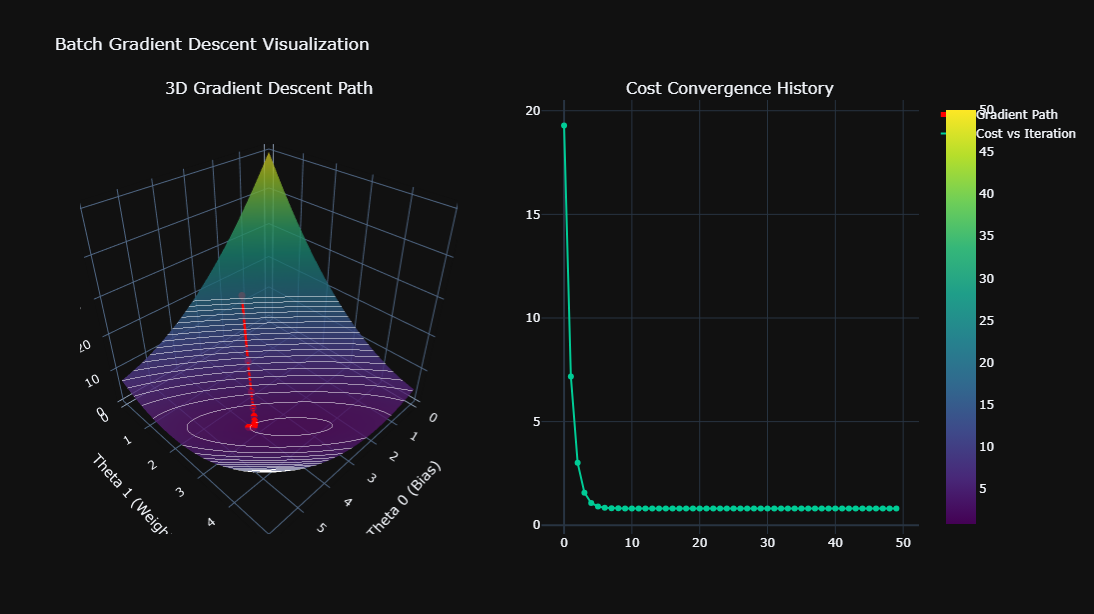

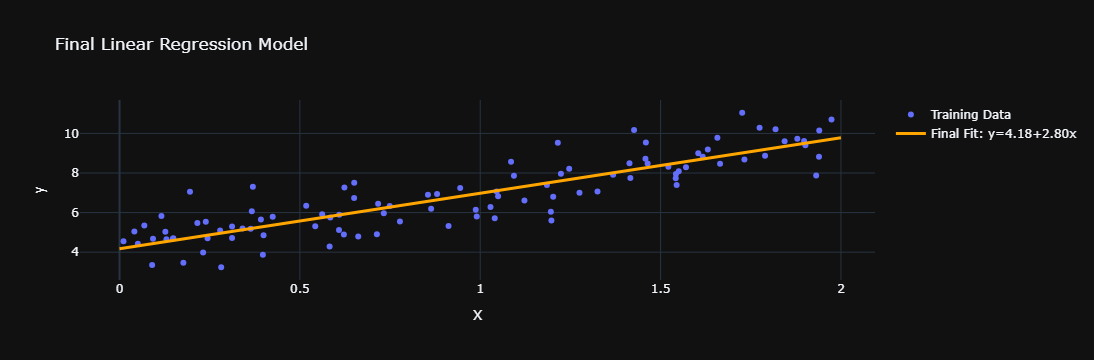

In [16]:
fig_3d, fig_2d = create_visualizations(X, y, history)
    
print("Opening visualizations...")
fig_3d.show()
fig_2d.show()